In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Collection

- 8 data frames
- merged using inner joins
- joined on id's of each csv file

In [48]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
base_dir = '/content/drive/My Drive/MIE368 Project/data'

directory_files = os.listdir(base_dir)

directory_files


['lap_times.csv',
 'constructor_standings.csv',
 'pit_stops.csv',
 'qualifying.csv',
 'constructor_results.csv',
 'circuits.csv',
 'driver_standings.csv',
 'drivers.csv',
 'status.csv',
 'races.csv',
 'sprint_results.csv',
 'results.csv',
 'constructors.csv',
 'seasons.csv']

In [49]:
constructors = pd.read_csv(base_dir + '/constructors.csv')
circuit = pd.read_csv(base_dir + '/circuits.csv')
results = pd.read_csv(base_dir + '/results.csv')
races = pd.read_csv(base_dir + '/races.csv')
quali = pd.read_csv(base_dir + '/qualifying.csv')
drivers = pd.read_csv(base_dir + '/drivers.csv')
constructor_standings = pd.read_csv(base_dir + '/constructor_standings.csv')
driver_standings = pd.read_csv(base_dir + '/driver_standings.csv')
driver_standings = driver_standings.drop('position', axis = 1)
constructor_standings = constructor_standings.drop('position', axis = 1)

In [50]:
df1 = pd.merge(races,results,how='inner',on=['raceId'])
df2 = pd.merge(df1,quali,how='inner',on=['raceId','driverId','constructorId'])
df3 = pd.merge(df2,drivers,how='inner',on=['driverId'])
df4 = pd.merge(df3,constructors,how='inner',on=['constructorId'])
df5 = pd.merge(df4,circuit,how='inner',on=['circuitId'])
df6 = pd.merge(df5, constructor_standings, how = 'inner', on=['raceId', 'constructorId'])
df7 = pd.merge(df6, driver_standings, how = 'inner', on = ['raceId', 'driverId'])

<ipython-input-50-fc0b6df8afe7>:5: FutureWarning: Passing 'suffixes' which cause duplicate columns {'url_x'} in the result is deprecated and will raise a MergeError in a future version.
  df5 = pd.merge(df4,circuit,how='inner',on=['circuitId'])


In [51]:
df7.columns

Index(['raceId', 'year', 'round', 'circuitId', 'name_x', 'date', 'time_x',
       'url_x', 'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date',
       'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time',
       'resultId', 'driverId', 'constructorId', 'number_x', 'grid',
       'position_x', 'positionText_x', 'positionOrder', 'points_x', 'laps',
       'time_y', 'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId', 'qualifyId', 'number_y', 'position_y',
       'q1', 'q2', 'q3', 'driverRef', 'number', 'code', 'forename', 'surname',
       'dob', 'nationality_x', 'url_y', 'constructorRef', 'name_y',
       'nationality_y', 'url_x', 'circuitRef', 'name', 'location', 'country',
       'lat', 'lng', 'alt', 'url_y', 'constructorStandingsId', 'points_y',
       'positionText_y', 'wins_x', 'driverStandingsId', 'points',
       'positionText', 'wins_y'],
      dtype='object')

In [52]:
#drop the columns which are not important
data = df7.drop(['circuitId','time_x','url_x','resultId',
                 'constructorId','number_x','positionText','position_x',
                 'positionOrder','laps','time_y','rank',
                 'fastestLapTime','fastestLapSpeed','qualifyId','driverRef','number','code','url_y','circuitRef',
                 'location','lat','lng','alt','number_y','points','constructorRef','name_x','raceId','fastestLap','q2','q3','milliseconds','q1'],1)

<ipython-input-52-6b822b0ccecd>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data = df7.drop(['circuitId','time_x','url_x','resultId',


In [53]:
#We want to look at data only from the past 33 years to bring more relevance to the dataset
data = data[data['year'] >= 1990]

In [54]:
data.columns

Index(['year', 'round', 'date', 'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time',
       'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date',
       'sprint_time', 'driverId', 'grid', 'positionText_x', 'points_x',
       'statusId', 'position_y', 'forename', 'surname', 'dob', 'nationality_x',
       'name_y', 'nationality_y', 'name', 'country', 'constructorStandingsId',
       'points_y', 'positionText_y', 'wins_x', 'driverStandingsId', 'wins_y'],
      dtype='object')

In [55]:
data.head(n=6)

,year,round,date,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,...,name_y,nationality_y,name,country,constructorStandingsId,points_y,positionText_y,wins_x,driverStandingsId,wins_y
0,2009,1,2009-03-29,\N,\N,\N,\N,\N,\N,\N,...,Brawn,British,Albert Park Grand Prix Circuit,Australia,4038,18.0,1,1,8247,1
1,2009,1,2009-03-29,\N,\N,\N,\N,\N,\N,\N,...,Brawn,British,Albert Park Grand Prix Circuit,Australia,4038,18.0,1,1,8248,0
2,2007,1,2007-03-18,\N,\N,\N,\N,\N,\N,\N,...,Honda,Japanese,Albert Park Grand Prix Circuit,Australia,25739,0.0,6,0,13627,0
3,2007,1,2007-03-18,\N,\N,\N,\N,\N,\N,\N,...,Honda,Japanese,Albert Park Grand Prix Circuit,Australia,25739,0.0,6,0,13623,0
4,2006,3,2006-04-02,\N,\N,\N,\N,\N,\N,\N,...,Honda,Japanese,Albert Park Grand Prix Circuit,Australia,6342,13.0,4,0,12849,0
5,2006,3,2006-04-02,\N,\N,\N,\N,\N,\N,\N,...,Honda,Japanese,Albert Park Grand Prix Circuit,Australia,6342,13.0,4,0,12860,0


# Data Cleaning

- Check missing values
- Checking consistency of data types
- replace team names with correct updated names
- calculate driver ages
- drop irrelavant columns

In [56]:
#Looking at the shape of our initial data set
data.shape

(9562, 33)

In [57]:
#From here, we can see that our data is good regarding missing data points and there is no need for imputation
no_missing = data.isnull().sum()
total_missing=no_missing.sum()

print(no_missing)
print(total_missing)

year                      0
round                     0
date                      0
fp1_date                  0
fp1_time                  0
fp2_date                  0
fp2_time                  0
fp3_date                  0
fp3_time                  0
quali_date                0
quali_time                0
sprint_date               0
sprint_time               0
driverId                  0
grid                      0
positionText_x            0
points_x                  0
statusId                  0
position_y                0
forename                  0
surname                   0
dob                       0
nationality_x             0
name_y                    0
nationality_y             0
name                      0
country                   0
constructorStandingsId    0
points_y                  0
positionText_y            0
wins_x                    0
driverStandingsId         0
wins_y                    0
dtype: int64
0


In [58]:
from datetime import datetime
#Converting date and DOB variables to date time dtype in order to feature engineer the drivers age's
data['dob'] = pd.to_datetime(data['dob'])
data['date'] = pd.to_datetime(data['date'])

#Creating feature of drivers age based on the absolute difference between date of birth and the date at the grand prix
dates = abs(data['date']- data['dob'])
age = dates.dt.days/365
data['driver_age'] = round(age)
data['driver_age'].astype(int)

#changing the name of some columns
data.rename(columns={'name':'GP_circuit','position_y':'position',
                     'name_y':'team_name','nationality_x':'driver_nationality',
                     'nationality_y':'team_nationality', 'year': 'season', 'wins_x': 'driver_wins', 'wins_y': 'constructor_wins'},inplace=True)



In [59]:
#team names have changed from past years so this section is updating the older names and replacing them
data['team_name'] = data['team_name'].apply(lambda x: 'Renault' if x=='Lotus F1' else x)
data['team_name'] = data['team_name'].apply(lambda x: 'Renault' if x=='Alpine' else x)
data['team_name'] = data['team_name'].apply(lambda x: 'Racing Point' if x=='Force India' else x)
data['team_name'] = data['team_name'].apply(lambda x: 'Racing Point' if x=='Aston Martin' else x)
data['team_name'] = data['team_name'].apply(lambda x: 'Alfa Romeo' if x=='Sauber' else x)
data['team_name'] = data['team_name'].apply(lambda x: 'AlphaTauri' if x=='Toro Rosso' else x)

In [60]:
#reasons for DNF(did not finish)
data['driver_dnf'] = data['statusId'].apply(lambda x: 1 if x in [3,4,20,29,31,41,68,73,81,97,82,104,107,130,137] else 0)
data['constructor_dnf'] = data['statusId'].apply(lambda x: 1 if x not in [3,4,20,29,31,41,68,73,81,97,82,104,107,130,137,1] else 0)
data['driver'] = data['forename']+' '+data['surname']
data.drop(['forename','surname'],1,inplace=True)

<ipython-input-60-86c451e5f1c0>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data.drop(['forename','surname'],1,inplace=True)


In [61]:
#removing more irrelavant columns
data = data.drop(columns = ['fp1_date', 'fp1_time', 'fp2_date', 'fp2_time',
                            'fp3_date','fp3_time', 'quali_date', 'quali_time',
                            'sprint_date', 'sprint_time', 'positionText_x', 'points_x', 'points_y', 'positionText_y'])

In [62]:
#Making a feature for if the country that the race is taking place at is a drivers home country
data['driver_nationality'] = data['driver_nationality'].apply(lambda x: str(x)[:3])
data['team_nationality'] = data['team_nationality'].apply(lambda x: str(x)[:3])
data['country'] = data['country'].apply(lambda x: 'Bri' if x=='UK' else x)
data['country'] = data['country'].apply(lambda x: 'Ame' if x=='USA' else x)
data['country'] = data['country'].apply(lambda x: 'Fre' if x=='Fra' else x)
data['country'] = data['country'].apply(lambda x: str(x)[:3])
data['driver_home'] = data['driver_nationality'] == data['country']
data['team_home'] = data['team_nationality'] == data['country']
data['driver_home'] = data['driver_home'].apply(lambda x: int(x))
data['team_home'] = data['team_home'].apply(lambda x: int(x))

In [63]:
data.dtypes

season                             int64
round                              int64
date                      datetime64[ns]
driverId                           int64
grid                               int64
statusId                           int64
position                           int64
dob                       datetime64[ns]
driver_nationality                object
team_name                         object
team_nationality                  object
GP_circuit                        object
country                           object
constructorStandingsId             int64
driver_wins                        int64
driverStandingsId                  int64
constructor_wins                   int64
driver_age                       float64
driver_dnf                         int64
constructor_dnf                    int64
driver                            object
driver_home                        int64
team_home                          int64
dtype: object

# Initial Feature Engineering

- Adding binary feature for race winner
- Adding binary feature for a podium winner

In [64]:
#Making a binary feature for whether a driver won a race 0/1

race_winner_list = []
fdf = data['position']

for i in range(len(fdf)):
  if fdf[i] == 1:
    race_winner_list.append(1)
  else:
    race_winner_list.append(0)

data['race_winner'] = race_winner_list


In [65]:
# Binary feature for top 3 0/1 - podium

podium_list = []
fdf2 = data['position']

for i in range(len(fdf2)):
  if fdf2[i] <4:
    podium_list.append(1)
  else:
    podium_list.append(0)

data['podium_winner'] = podium_list


In [66]:
# create variable to rep. gain/loss of position
pos_change = data['grid'] - data['position']
data['pos_delta'] = pos_change

In [67]:
#Calculating driver dnf ratio
dnf_by_driver = data.groupby('driver').sum()['driver_dnf']
driver_race_entered = data.groupby('driver').count()['driver_dnf']
driver_dnf_ratio = (dnf_by_driver/driver_race_entered)

dnf_ratio_dict = dict(zip(driver_dnf_ratio.index,driver_dnf_ratio))
data['driver_dnf_ratio'] = data['driver'].apply(lambda x:dnf_ratio_dict[x])

<ipython-input-67-01094a18e83f>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dnf_by_driver = data.groupby('driver').sum()['driver_dnf']


# Exploratory Data Analysis

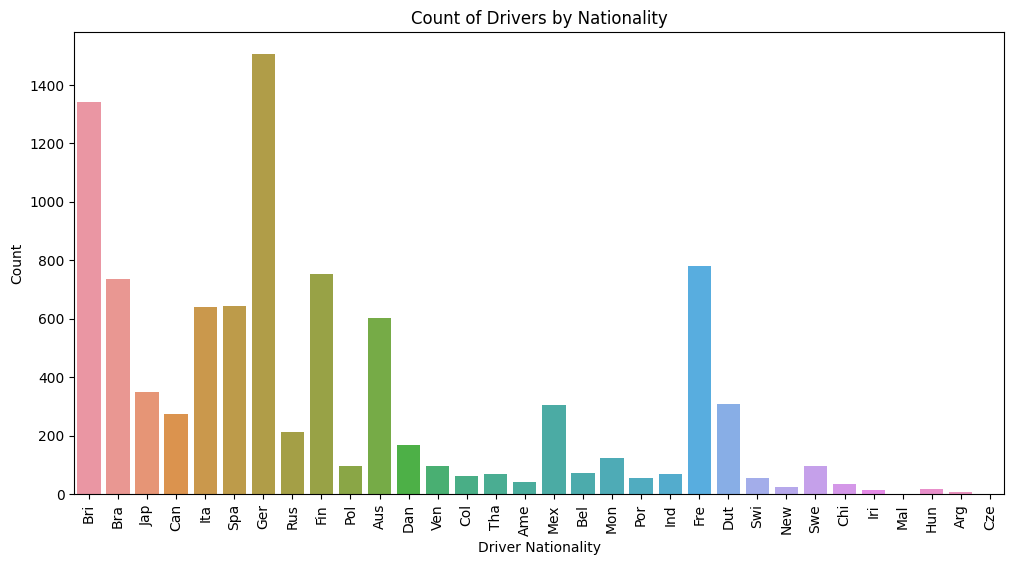

In [68]:
#Visual of driver nationality
plt.figure(figsize=(12, 6))
sns.countplot(x='driver_nationality', data=data)
plt.xticks(rotation=90)
plt.xlabel('Driver Nationality')
plt.ylabel('Count')
plt.title('Count of Drivers by Nationality')
plt.show()

In [69]:
#Looking at averages per season

avg_per_season = data.groupby('season').mean()

<ipython-input-69-31dab499ee4a>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_per_season = data.groupby('season').mean()


<ipython-input-70-1cc90a2d97f9>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['driver_age'])


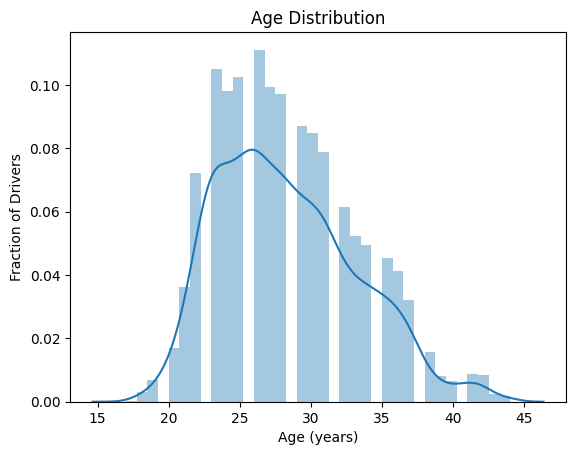

In [70]:
# plot age distribution
sns.distplot(data['driver_age'])

# format axis lables
plt.title('Age Distribution')
plt.ylabel('Fraction of Drivers')
plt.xlabel('Age (years)')
plt.show()

In [71]:
# Group the data by 'season'
season_grouped = data.groupby('season')

# Initialize empty lists to store maximum and minimum ages
max_driver_ages = []
min_driver_ages = []

# Iterate through each season group
for season, season_data in season_grouped:
    # Find the maximum and minimum driver ages for the current season
    max_age = season_data['driver_age'].max()
    min_age = season_data['driver_age'].min()

    # Append the max and min ages to the respective lists
    max_driver_ages.append(max_age)
    min_driver_ages.append(min_age)

# Calculate the average of maximum driver ages and minimum driver ages across all seasons
average_max_age = sum(max_driver_ages) / len(max_driver_ages)
average_min_age = sum(min_driver_ages) / len(min_driver_ages)

# Print the results
print(f'Average of Maximum Driver Ages: {average_max_age:.2f}')
print(f'Average of Minimum Driver Ages: {average_min_age:.2f}')


Average of Maximum Driver Ages: 38.87
Average of Minimum Driver Ages: 20.70


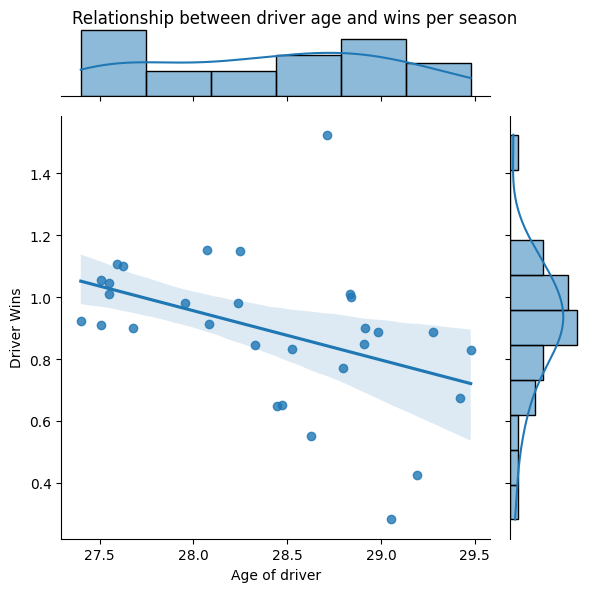

,driver_wins,driver_age
driver_wins,1.000000,-0.429558
driver_age,-0.429558,1.000000


In [72]:
#Distribution showing relationship between driver age and number of wins per season

# define variables
x = avg_per_season['driver_age']
y = avg_per_season['driver_wins']

# plot the data in a joint plot
sns.jointplot(data=avg_per_season, x=x, y=y, kind='reg')

plt.xlabel('Age of driver')
plt.ylabel('Driver Wins')
plt.tight_layout()

plt.suptitle('Relationship between driver age and wins per season')
plt.subplots_adjust(top=0.95) # Reduce plot to make room

plt.show()

# shows that age is inversely correlated with wins
# the older you get the less you win on average

# correlation coefficent to confirm relationship
avg_per_season[['driver_wins','driver_age']].corr()

In [73]:
#Average wins per driver per season
avg_per_season['driver_wins'].mean()

0.8931266185072055

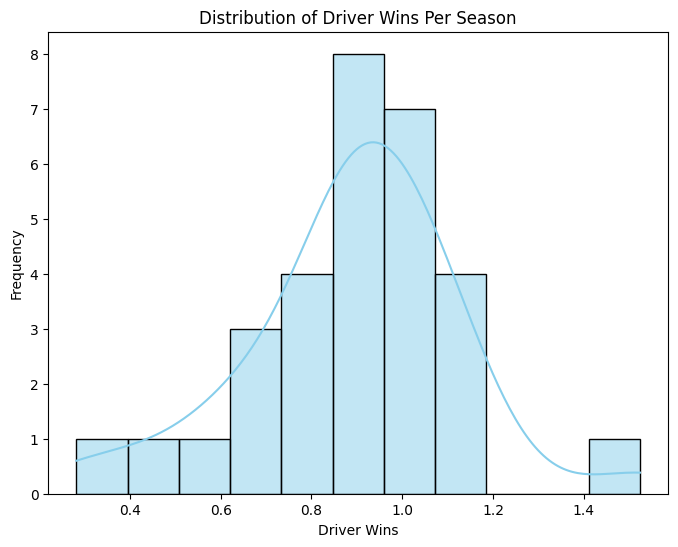

In [74]:
plt.figure(figsize=(8, 6))
sns.histplot(avg_per_season['driver_wins'], kde=True, color='skyblue')
plt.xlabel('Driver Wins')
plt.ylabel('Frequency')
plt.title('Distribution of Driver Wins Per Season')
plt.show()


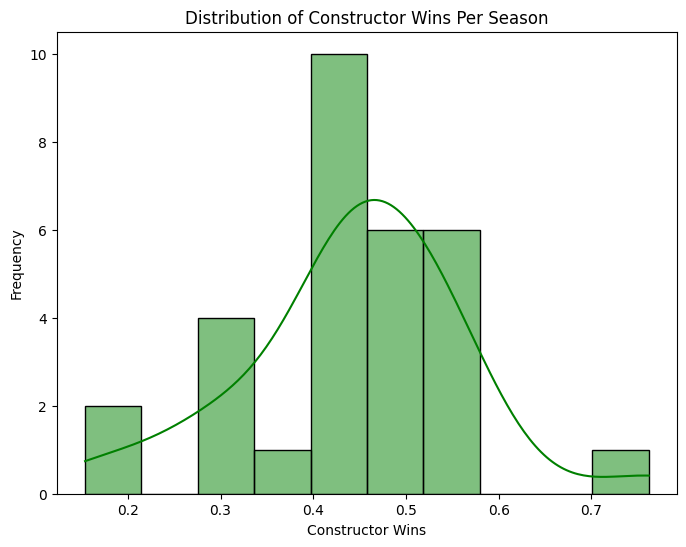

In [75]:
plt.figure(figsize=(8, 6))
sns.histplot(avg_per_season['constructor_wins'], kde=True, color='green')
plt.xlabel('Constructor Wins')
plt.ylabel('Frequency')
plt.title('Distribution of Constructor Wins Per Season')
plt.show()


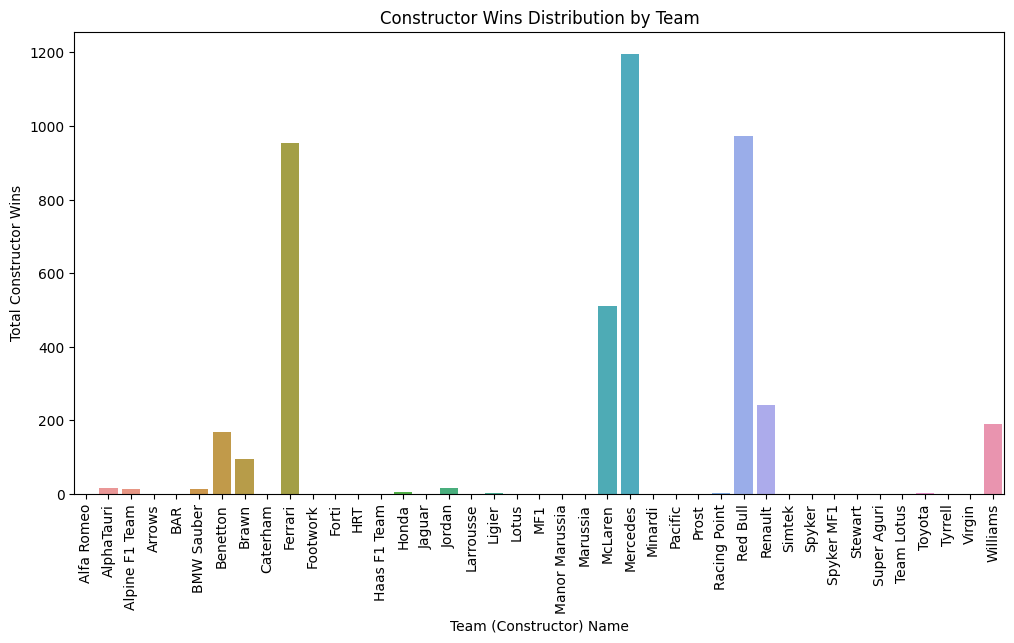

In [76]:


# Group the data by 'team_name' (or 'constructor') and calculate the total constructor wins
constructor_wins_by_team = data.groupby('team_name')['constructor_wins'].sum().reset_index()

# Create a distribution plot
plt.figure(figsize=(12, 6))
sns.barplot(x='team_name', y='constructor_wins', data=constructor_wins_by_team)
plt.xlabel('Team (Constructor) Name')
plt.ylabel('Total Constructor Wins')
plt.title('Constructor Wins Distribution by Team')
plt.xticks(rotation=90)
plt.show()



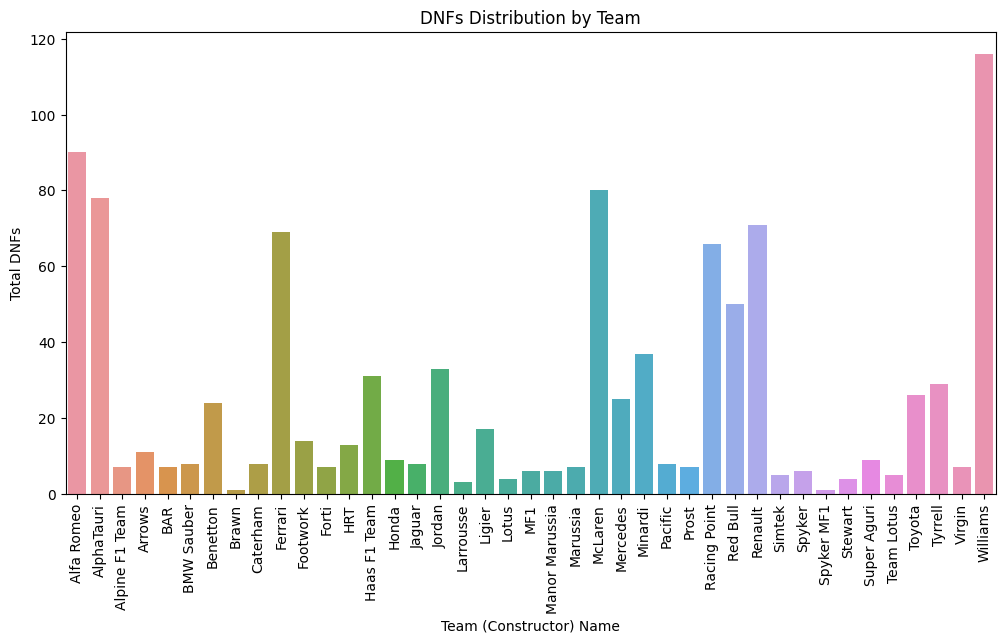

In [77]:
# Group the data by 'team_name' and calculate the total number of DNFs
dnfs_by_team = data.groupby('team_name')['driver_dnf'].sum().reset_index()

# Create a distribution plot
plt.figure(figsize=(12, 6))
sns.barplot(x='team_name', y='driver_dnf', data=dnfs_by_team)
plt.xlabel('Team (Constructor) Name')
plt.ylabel('Total DNFs')
plt.title('DNFs Distribution by Team')
plt.xticks(rotation=90)
plt.show()

In [78]:
# Group the data by the 'team_name' column and calculate the sum of DNFs for each team
team_dnf_counts = data.groupby('team_name')['driver_dnf'].sum().reset_index()

# Find the team with the most DNFs
most_dnf_team = team_dnf_counts[team_dnf_counts['driver_dnf'] == team_dnf_counts['driver_dnf'].max()]
most_dnf_team_name = most_dnf_team.iloc[0]['team_name']
most_dnf_count = most_dnf_team.iloc[0]['driver_dnf']

# Print the results
print(f'Team with the most DNFs: {most_dnf_team_name} with {most_dnf_count} DNFs')


Team with the most DNFs: Williams with 116 DNFs


In [79]:
#Average DNF's per driver per season
avg_per_season['driver_dnf'].mean()

0.11105458010240706

In [80]:
#max dnf's in a given season by all drivers
season_data = data.groupby('season')

total_dnf = season_data['driver_dnf'].sum()
print(f'The max number of dnfs in a given season was: {total_dnf.max()} in year: {total_dnf.idxmax()}')
print(f'The least number of dnfs in a given season was: {total_dnf.min()} in year: {total_dnf.idxmin()}')

The max number of dnfs in a given season was: 87 in year: 1994
The least number of dnfs in a given season was: 1 in year: 2001


In [81]:
# Group the data by circuit and count the DNFs
circuit_dnf_counts = data.groupby('GP_circuit')['driver_dnf'].sum().reset_index()

# Find the circuit with the most DNFs
most_dnf_circuit = circuit_dnf_counts[circuit_dnf_counts['driver_dnf'] == circuit_dnf_counts['driver_dnf'].max()]
most_dnf_circuit_name = most_dnf_circuit.iloc[0]['GP_circuit']
most_dnf_count = most_dnf_circuit.iloc[0]['driver_dnf']

# Find the circuit with the least DNFs
least_dnf_circuit = circuit_dnf_counts[circuit_dnf_counts['driver_dnf'] == circuit_dnf_counts['driver_dnf'].min()]
least_dnf_circuit_name = least_dnf_circuit.iloc[0]['GP_circuit']
least_dnf_count = least_dnf_circuit.iloc[0]['driver_dnf']

# Print the results
print(f'Circuit with the most DNFs: {most_dnf_circuit_name} with {most_dnf_count} DNFs')
print(f'Circuit with the least DNFs: {least_dnf_circuit_name} with {least_dnf_count} DNFs')


Circuit with the most DNFs: Circuit de Monaco with 94 DNFs
Circuit with the least DNFs: Circuit Park Zandvoort with 0 DNFs


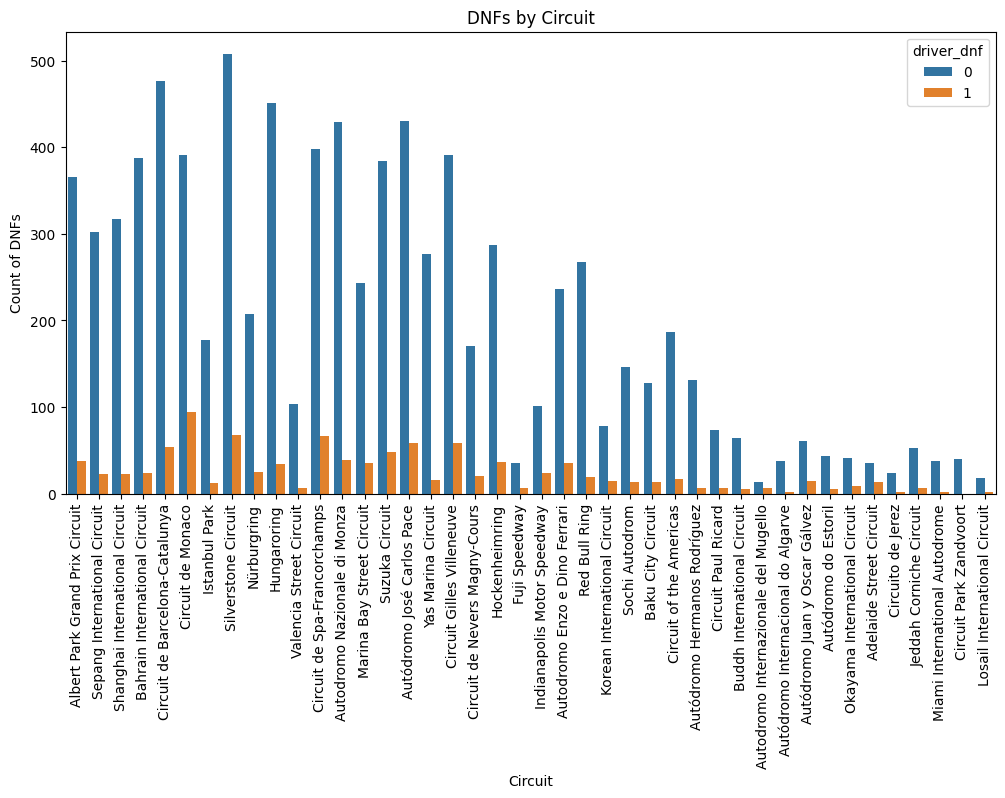

In [82]:
plt.figure(figsize=(12, 6))
sns.countplot(x='GP_circuit', data=data, hue='driver_dnf')
plt.xlabel('Circuit')
plt.ylabel('Count of DNFs')
plt.title('DNFs by Circuit')
plt.xticks(rotation=90)
plt.show()


<Axes: >

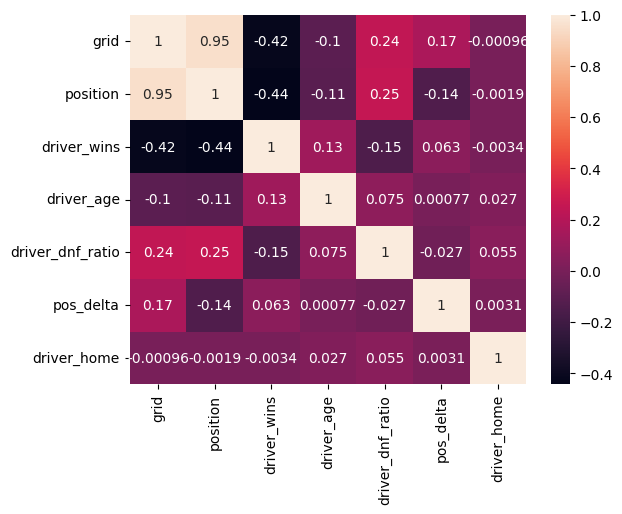

In [83]:
df_corr = data[['grid', 'position', 'driver_wins', 'driver_age', 'driver_dnf_ratio', 'pos_delta', 'driver_home']].corr()

sns.heatmap(df_corr, annot = True)

# Further Data Pre Processing

- Getting cleaned data ready to feed into classification models

In [84]:
#This section aims to highlight which drivers and constructors are active in the 2023 season for predictions


active_constructors = ['Renault', 'Williams', 'McLaren', 'Ferrari', 'Mercedes',
                       'AlphaTauri', 'Racing Point', 'Alfa Romeo', 'Red Bull',
                       'Haas F1 Team']
active_drivers = ['Daniel Ricciardo', 'Kevin Magnussen', 'Carlos Sainz',
                  'Valtteri Bottas', 'Lance Stroll', 'George Russell',
                  'Lando Norris','Charles Leclerc', 'Lewis Hamilton',
                  'Max Verstappen', 'Pierre Gasly', 'Alexander Albon',
                  'Sergio Pérez', 'Esteban Ocon', 'Fernando Alonso', 'Oscar Piastri',
                  'Nico Hülkenberg', 'Guanyu Zhou', 'Yuki Tsunoda',
                  'Liam Lawson', 'Nyck de Vries', 'Logan Sargeant'
                 ]
data['active_driver'] = data['driver'].apply(lambda x: int(x in active_drivers))
data['active_constructor'] = data['team_name'].apply(lambda x: int(x in active_constructors))

In [85]:
data[data['season'] == 2023]

,season,round,date,driverId,grid,statusId,position,dob,driver_nationality,team_name,...,constructor_dnf,driver,driver_home,team_home,race_winner,podium_winner,pos_delta,driver_dnf_ratio,active_driver,active_constructor
85,2023,3,2023-04-02,848,8,3,8,1996-03-23,Tha,Williams,...,0,Alexander Albon,0,0,0,0,0,0.071429,1,1
86,2023,3,2023-04-02,858,18,4,18,2000-12-31,Ame,Williams,...,0,Logan Sargeant,0,0,0,0,0,0.166667,1,1
125,2023,3,2023-04-02,846,13,1,13,1999-11-13,Bri,McLaren,...,0,Lando Norris,0,0,0,0,0,0.042553,1,1
126,2023,3,2023-04-02,857,16,1,16,2001-04-06,Aus,McLaren,...,0,Oscar Piastri,1,0,0,0,0,0.083333,1,1
167,2023,3,2023-04-02,832,5,1,5,1994-09-01,Spa,Ferrari,...,0,Carlos Sainz,0,0,0,0,0,0.097701,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9493,2023,5,2023-05-07,855,14,1,14,1999-05-30,Chi,Alfa Romeo,...,0,Guanyu Zhou,0,0,0,0,0,0.058824,1,1
9494,2023,5,2023-05-07,807,12,1,12,1987-08-19,Ger,Haas F1 Team,...,0,Nico Hülkenberg,0,1,0,0,0,0.092308,1,1
9495,2023,5,2023-05-07,825,4,1,4,1992-10-05,Dan,Haas F1 Team,...,0,Kevin Magnussen,0,1,0,0,0,0.078431,1,1
9500,2023,5,2023-05-07,852,17,1,17,2000-05-11,Jap,AlphaTauri,...,0,Yuki Tsunoda,0,0,0,0,0,0.071429,1,1


In [86]:
data.head()

,season,round,date,driverId,grid,statusId,position,dob,driver_nationality,team_name,...,constructor_dnf,driver,driver_home,team_home,race_winner,podium_winner,pos_delta,driver_dnf_ratio,active_driver,active_constructor
0,2009,1,2009-03-29,18,1,1,1,1980-01-19,Bri,Brawn,...,0,Jenson Button,0,0,1,1,0,0.072797,0,0
1,2009,1,2009-03-29,22,2,1,2,1972-05-23,Bra,Brawn,...,0,Rubens Barrichello,0,0,0,1,0,0.089623,0,0
2,2007,1,2007-03-18,18,14,11,14,1980-01-19,Bri,Honda,...,1,Jenson Button,0,0,0,0,0,0.072797,0,0
3,2007,1,2007-03-18,22,16,11,17,1972-05-23,Bra,Honda,...,1,Rubens Barrichello,0,0,0,0,-1,0.089623,0,0
4,2006,3,2006-04-02,18,1,11,1,1980-01-19,Bri,Honda,...,1,Jenson Button,0,0,1,1,0,0.072797,0,0


In [87]:
data.dtypes

season                             int64
round                              int64
date                      datetime64[ns]
driverId                           int64
grid                               int64
statusId                           int64
position                           int64
dob                       datetime64[ns]
driver_nationality                object
team_name                         object
team_nationality                  object
GP_circuit                        object
country                           object
constructorStandingsId             int64
driver_wins                        int64
driverStandingsId                  int64
constructor_wins                   int64
driver_age                       float64
driver_dnf                         int64
constructor_dnf                    int64
driver                            object
driver_home                        int64
team_home                          int64
race_winner                        int64
podium_winner   

In [88]:
cleaned_df = data[['season', 'round','GP_circuit', 'grid','team_name','driver','driver_age', 'driver_wins', 'constructor_wins', 'pos_delta','driver_dnf_ratio','position']]
cleaned_df

,season,round,GP_circuit,grid,team_name,driver,driver_age,driver_wins,constructor_wins,pos_delta,driver_dnf_ratio,position
0,2009,1,Albert Park Grand Prix Circuit,1,Brawn,Jenson Button,29.0,1,1,0,0.072797,1
1,2009,1,Albert Park Grand Prix Circuit,2,Brawn,Rubens Barrichello,37.0,1,0,0,0.089623,2
2,2007,1,Albert Park Grand Prix Circuit,14,Honda,Jenson Button,27.0,0,0,0,0.072797,14
3,2007,1,Albert Park Grand Prix Circuit,16,Honda,Rubens Barrichello,35.0,0,0,-1,0.089623,17
4,2006,3,Albert Park Grand Prix Circuit,1,Honda,Jenson Button,26.0,0,0,0,0.072797,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9557,2021,20,Losail International Circuit,18,Alfa Romeo,Antonio Giovinazzi,28.0,0,0,0,0.081967,18
9558,2021,20,Losail International Circuit,19,Haas F1 Team,Mick Schumacher,23.0,0,0,0,0.069767,19
9559,2021,20,Losail International Circuit,20,Haas F1 Team,Nikita Mazepin,23.0,0,0,0,0.136364,20
9560,2021,20,Losail International Circuit,2,AlphaTauri,Pierre Gasly,26.0,0,0,-2,0.084034,4


##Cleaned Data Frame Dictionary

|Feature          |Definition                                             |
|:---------------:|:------------------------------------------------------|
|Season (int)           |The year in which the race takes place                |
|Round (int)            |The specific round in the season |    
|GP_circuit (str) | The circuit at which the race occurs|
|grid (int) | Starting position of each driver|
|team_name (str) | Constructor Name|
|driver (str) | The name of each driver|
|driver_age (int) | The age of each driver|
|driver_wins (int) | The number of wins a driver has in that season at time of race|
|constructor_wins (int) | The number of wins a team has at a specific point in the season|
|pos_delta (int) | How many positions gained or lost in a race|
|driver_dnf_ratio (float) | The ratio of unfinished races to total races entered|
|position (int) | Target Var - Place of finish for each driver|



## One-Hot Encoding

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder


# Step 1: Encode Categorical Features

# one-hot encoding for 'GP_circuit' and 'team_name':
cleaned_df = pd.get_dummies(cleaned_df, columns=['GP_circuit', 'team_name'])


# Step 2: Split the Data
#Train on data from 2000 - 2018
train_data = cleaned_df[(cleaned_df['season'] >= 2000) & (cleaned_df['season'] < 2019)]

#Validate on data from 2019-2022
validation_data = cleaned_df[(cleaned_df['season'] >= 2019) & (cleaned_df['season'] <= 2022)]

#Test on 2023 grand prix using a function we will define after model selection
test_data = cleaned_df[(cleaned_df['season'] == 2023)]

drop_X = ['position', 'driver']

X_train = train_data.drop(drop_X, axis=1)  # Features for training
y_train = train_data['position']  # Target variable for training

X_validate = validation_data.drop(drop_X, axis = 1)
y_validate = validation_data['position']

X_test = test_data.drop(drop_X, axis=1)  # Features for testing
y_test = test_data['position']  # Target variable for testing


# Print the shapes of the train and test sets
print("Training data shape:", X_train.shape, y_train.shape)
print("Testing data shape:", X_test.shape, y_test.shape)
print("Validation data shape:", X_validate.shape, y_validate.shape)

Training data shape: (6429, 91) (6429,)
Testing data shape: (240, 91) (240,)
Validation data shape: (1637, 91) (1637,)


## Robust Scaler

In [90]:
from sklearn.preprocessing import RobustScaler

# Initialize the RobustScaler
scaler = RobustScaler()

# Fit and transform the scaler on training data
X_train_scaled = scaler.fit_transform(X_train)

X_validate_scaled = scaler.transform(X_validate)

# Transform testing data using the same scaler
X_test_scaled = scaler.transform(X_test)


#Prediction Iteration 1



## Model Building + Evaluating

Model: Random Forest
Train Accuracy: 1.00
Validate Accuracy: 0.66

Model: SVM
Train Accuracy: 0.99
Validate Accuracy: 1.00

Model: KNN
Train Accuracy: 0.38
Validate Accuracy: 0.15

Model: Logistic Regression
Train Accuracy: 0.98
Validate Accuracy: 0.95



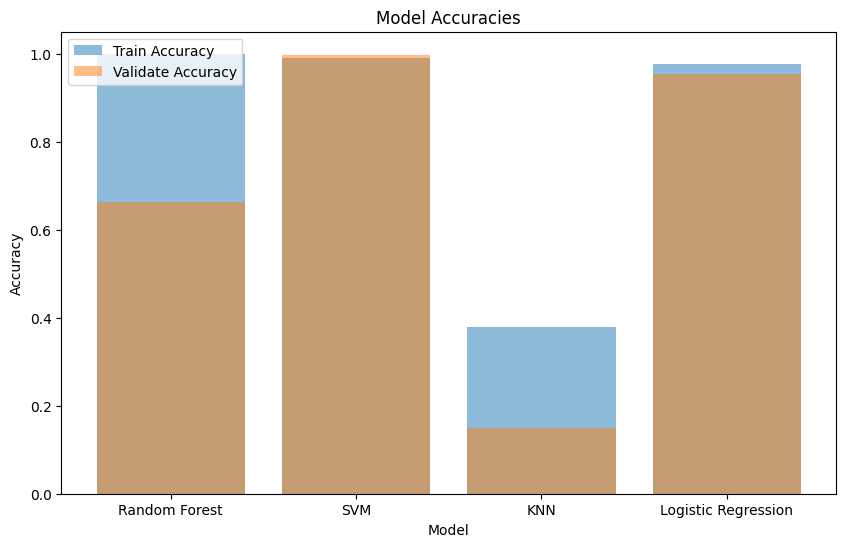

In [91]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Define a function to evaluate models
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    if model_name == 'Random Forest':
        model = RandomForestClassifier(
            n_estimators=200,  # Increase the number of trees
            max_depth=20,     # Adjust the maximum depth of the trees
            random_state=42
        )

    elif model_name == 'SVM':
        model = SVC(
            kernel='linear',  # Adjust the kernel type (e.g., 'rbf', 'linear')
            C=1.0,         # Adjust the regularization parameter
            random_state=42
        )
    elif model_name == 'KNN':
        model = KNeighborsClassifier(
            n_neighbors=5,    # Adjust the number of neighbors
            weights='uniform'  # Adjust the weight function (e.g., 'uniform' or 'distance')
        )
    elif model_name == 'Logistic Regression':
        model = LogisticRegression(
            max_iter = 3000,
            C=100,       # Adjust the regularization strength
            penalty='l2'  # Adjust the penalty type (e.g., 'l1' or 'l2')
        )

    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate evaluation metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    if model_name == 'SVM' or model_name == 'Logistic Regression':
        # For SVM and Logistic Regression, use decision_function
        y_test_prob = model.decision_function(X_test)
    else:
        # For other models, use predict_proba
        y_test_prob = model.predict_proba(X_test)


     # Print the evaluation metrics
    print(f"Model: {model_name}")
    print(f"Train Accuracy: {train_accuracy:.2f}")
    print(f"Validate Accuracy: {test_accuracy:.2f}")
    print()

    return train_accuracy, test_accuracy, y_test_prob, y_test_pred


# Initialize models
rf_model = RandomForestClassifier(random_state=42)
svm_model = SVC(random_state=42)
knn_model = KNeighborsClassifier()
logistic_model = LogisticRegression(random_state=42)

# List of models for iteration
models = [
    (rf_model, 'Random Forest'),
    (svm_model, 'SVM'),
    (knn_model, 'KNN'),
    (logistic_model, 'Logistic Regression')
]


# Create lists to store train and test accuracies
train_accuracies = []
test_accuracies = []

# Iterate through models, evaluate, and store results
for model, model_name in models:
    train_accuracy, test_accuracy, y_test_prob, y_test_pred = evaluate_model(model, X_train_scaled, y_train, X_test_scaled, y_test, model_name)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plot accuracies
plt.figure(figsize=(10, 6))
plt.bar([model_name for _, model_name in models], train_accuracies, alpha=0.5, label='Train Accuracy')
plt.bar([model_name for _, model_name in models], test_accuracies, alpha=0.5, label='Validate Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracies')
plt.legend(loc='best')
plt.show()

# Cross Validation and Hyperparamter Tuning

## Random Forest Model

In [92]:
from sklearn.model_selection import GridSearchCV

# Random Forest hyperparameter tuning
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [30, 50],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [1]
}

rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv = 4, n_jobs = -1, scoring='accuracy')
rf_grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and the corresponding accuracy
print("Random Forest - Best Parameters:", rf_grid_search.best_params_)
print("Random Forest - Best Accuracy:", rf_grid_search.best_score_)

# Get the best Random Forest model
best_rf_model = rf_grid_search.best_estimator_

validate_score = best_rf_model.score(X_validate_scaled, y_validate)
print("Random Forest - Validate Accuracy: ", validate_score)



Random Forest - Best Parameters: {'max_depth': 50, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Random Forest - Best Accuracy: 0.6997906585615792
Random Forest - Validate Accuracy:  0.6841783750763591


# Support Vector Machine (SVM) Model


In [93]:
# SVM hyperparameter tuning
svm_param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10]
}

svm_grid_search = GridSearchCV(SVC(random_state=42), svm_param_grid, cv=4, n_jobs = -1, scoring='accuracy')
svm_grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and the corresponding accuracy
print("SVM - Best Parameters:", svm_grid_search.best_params_)
print("SVM - Best Accuracy:", svm_grid_search.best_score_)

# Get the best SVM model
best_svm_model = svm_grid_search.best_estimator_

validate_score = best_svm_model.score(X_validate_scaled, y_validate)
print("SVM - Validate Accuracy: ", validate_score)




SVM - Best Parameters: {'C': 10, 'kernel': 'linear'}
SVM - Best Accuracy: 0.9998444306160548
SVM - Validate Accuracy:  1.0


# K Nearest Neighbors (KNN) Model

In [94]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,10))
n_neighbors = list(range(1,10))
p=[1,2]
weights = ['uniform', 'distance']
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p, weights = weights)


# KNN hyperparameter tuning
knn_param_grid = {
    'n_neighbors': [1, 3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1,2],
    'leaf_size': [1,7,10]
}

knn_grid_search = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=4, n_jobs = -1, scoring='accuracy')
knn_grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and the corresponding accuracy
print("KNN - Best Parameters:", knn_grid_search.best_params_)
print("KNN - Best Accuracy:", knn_grid_search.best_score_)

# Get the best KNN model
best_knn_model = knn_grid_search.best_estimator_

validate_score = best_knn_model.score(X_validate_scaled, y_validate)
print("KNN - Validate Accuracy: ", validate_score)




KNN - Best Parameters: {'leaf_size': 1, 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
KNN - Best Accuracy: 0.26862982071595976
KNN - Validate Accuracy:  0.21502748930971288


# Logistic Regression Model


In [98]:
# Logistic Regression hyperparameter tuning
logistic_param_grid = {
    'C': [0.1,1,10,50,100],
    'penalty': ['l2']
}

logistic_grid_search = GridSearchCV(LogisticRegression(max_iter = 3000, random_state=42), logistic_param_grid, cv=4, scoring='accuracy')
logistic_grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and the corresponding accuracy
print("Logistic Regression - Best Parameters:", logistic_grid_search.best_params_)
print("Logistic Regression - Best Accuracy:", logistic_grid_search.best_score_)

# Get the best Logistic Regression model
best_logistic_model = logistic_grid_search.best_estimator_

LR_validate_score = best_logistic_model.score(X_validate_scaled, y_validate)
print("LogReg - Validate Accuracy: ", LR_validate_score)


Logistic Regression - Best Parameters: {'C': 100, 'penalty': 'l2'}
Logistic Regression - Best Accuracy: 0.8506790294018396
LogReg - Validate Accuracy:  0.9700671960904093


In [ ]:
import numpy as np
# Create lists for train and Validate scores

#Train scores
rf_train_score = best_rf_model.score(X_train_scaled,y_train)
SVM_train_score = best_svm_model.score(X_train_scaled, y_train)
KNN_train_score = knn_grid_search.best_score_
LR_train_score = logistic_grid_search.best_score_

#Validate scores
rf_val_score = best_rf_model.score(X_validate_scaled,y_validate)
SVM_val_score = best_svm_model.score(X_validate_scaled,y_validate)
KNN_val_score = best_knn_model.score(X_validate_scaled,y_validate)
LR_val_score = LR_validate_score

train_scores = [rf_train_score, SVM_train_score, KNN_train_score, LR_train_score]
validate_scores = [rf_val_score, SVM_val_score, KNN_val_score, LR_val_score]

# Create a list of model names
model_names = ['Random Forest','SVM','KNN', 'Logistic Regression']

# Plot train and test scores
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(model_names))

plt.bar(index, train_scores, bar_width, label='Train Score')
plt.bar(index + bar_width, validate_scores, bar_width, label='Validate Score')

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Train and Validate Scores Post CV and HT')
plt.xticks(index + bar_width / 2, model_names)
plt.legend()
plt.show()